In [11]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from nltk.corpus import words
from sklearn.model_selection import train_test_split

import seaborn as sns


In [12]:
# Set path
sent_pred_path = Path("Resources/Emotion_classify_Data.csv")
# Read file 
sent_prediction_df = pd.read_csv(sent_pred_path)
sent_prediction_df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [102]:
# Copy df
sentiment_prediction_df = sent_prediction_df.copy()

In [103]:
# Make new column to remove words its legnth is less than two
sentiment_prediction_df["tidy_comments"] = sentiment_prediction_df["Comment"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))
sentiment_prediction_df.head()

,Comment,Emotion,tidy_comments
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death but now feel ...
1,im so full of life i feel appalled,anger,full life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit here write start dig out feelings and thin...
3,ive been really angry with r and i feel like a...,joy,ive been really angry with and feel like idiot...
4,i feel suspicious if there is no one outside l...,fear,feel suspicious there one outside like the rap...


In [104]:
# Look for NULL values
sentiment_prediction_df.isnull().sum()

Comment          0
Emotion          0
tidy_comments    0
dtype: int64

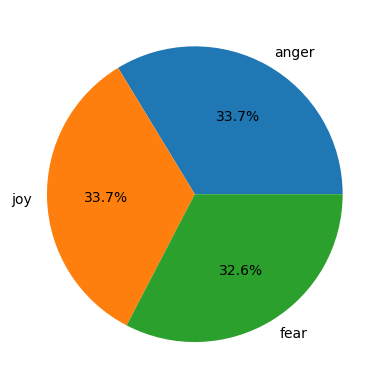

In [126]:
# Display value counts
pie_values = sentiment_prediction_df["Emotion"].value_counts().values 
pie_labels = sentiment_prediction_df["Emotion"].value_counts().index
# Plot value counts in a pie chart
plt.pie(pie_values,labels=pie_labels,autopct="%1.1f%%")
plt.show()

# Classic Decision Tree for NLP 

# Term Frequency-Inverse Document Frequency (TFIDF) Vectorizer 

In [128]:

#Initiate a tfidf instance
tfidf = TfidfVectorizer()   

#Fit and transform the features data
x = tfidf.fit_transform(sentiment_prediction_df['Comment'].values.astype('U'))

#Put the transformed features in a dataframe
x_df = pd.DataFrame(data=x.toarray(), columns=tfidf.get_feature_names_out())
x_df

,aa,aac,aaron,ab,abandon,abandoned,abandonment,abbigail,abc,abdomen,...,zendikar,zero,zest,zhu,zipline,zombies,zone,zonisamide,zq,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# Print the first comment in our sentiment_prediction_df
print(sentiment_prediction_df["Comment"][0])

i seriously hate one subject to death but now i feel reluctant to drop it


In [130]:
#  Print all frequencies for words in the first comment of the dataframe 
for i in zip(x_df.iloc[0].index, x_df.iloc[0].values):
    print(i)

('aa', 0.0)
('aac', 0.0)
('aaron', 0.0)
('ab', 0.0)
('abandon', 0.0)
('abandoned', 0.0)
('abandonment', 0.0)
('abbigail', 0.0)
('abc', 0.0)
('abdomen', 0.0)
('abelard', 0.0)
('abide', 0.0)
('abilities', 0.0)
('ability', 0.0)
('abit', 0.0)
('able', 0.0)
('abnormally', 0.0)
('abound', 0.0)
('about', 0.0)
('above', 0.0)
('abroad', 0.0)
('abruptly', 0.0)
('absence', 0.0)
('absolute', 0.0)
('absolutely', 0.0)
('absolutly', 0.0)
('absorbed', 0.0)
('abstract', 0.0)
('absurdity', 0.0)
('abuses', 0.0)
('abusive', 0.0)
('abyss', 0.0)
('academia', 0.0)
('academic', 0.0)
('academics', 0.0)
('accelerated', 0.0)
('accent', 0.0)
('accentuating', 0.0)
('accept', 0.0)
('acceptable', 0.0)
('acceptance', 0.0)
('accepted', 0.0)
('accepting', 0.0)
('accepts', 0.0)
('access', 0.0)
('accessories', 0.0)
('accident', 0.0)
('accidentally', 0.0)
('acclimated', 0.0)
('accommodation', 0.0)
('accompany', 0.0)
('accomplish', 0.0)
('accomplished', 0.0)
('accomplishing', 0.0)
('accomplishment', 0.0)
('accomplishments'

In [131]:
# Define the target variable for our data 
y = sentiment_prediction_df['Emotion']

# Train and test data for our model with a 80:20 split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(x_df, y, test_size=0.2, random_state = 78)

In [132]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [133]:
# # Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [134]:
# Making predictions using the testing data
predictions = model.predict(X_test)

In [135]:
# Calculate the accuracy score, classification report, confusion matrix and average test loss of the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
avg_test_loss = 1 - accuracy


In [139]:
# Display results
print(f"Accuracy Score: {accuracy}")
print(" ")
print(f"Average Test Loss: {avg_test_loss}")
print(" ")
print("The classification report:")
print(report)
print(" ")
print("The confusion matrix:")
print(matrix)

Accuracy Score: 0.9318181818181818
 
Average Test Loss: 0.06818181818181823
 
The classification report:
              precision    recall  f1-score   support

       anger       0.93      0.93      0.93       412
        fear       0.93      0.91      0.92       407
         joy       0.94      0.95      0.95       369

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

 
The confusion matrix:
[[385  17  10]
 [ 25 371  11]
 [  5  13 351]]


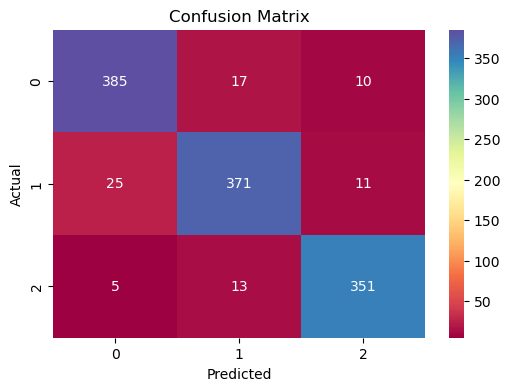

In [137]:
# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Spectral', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

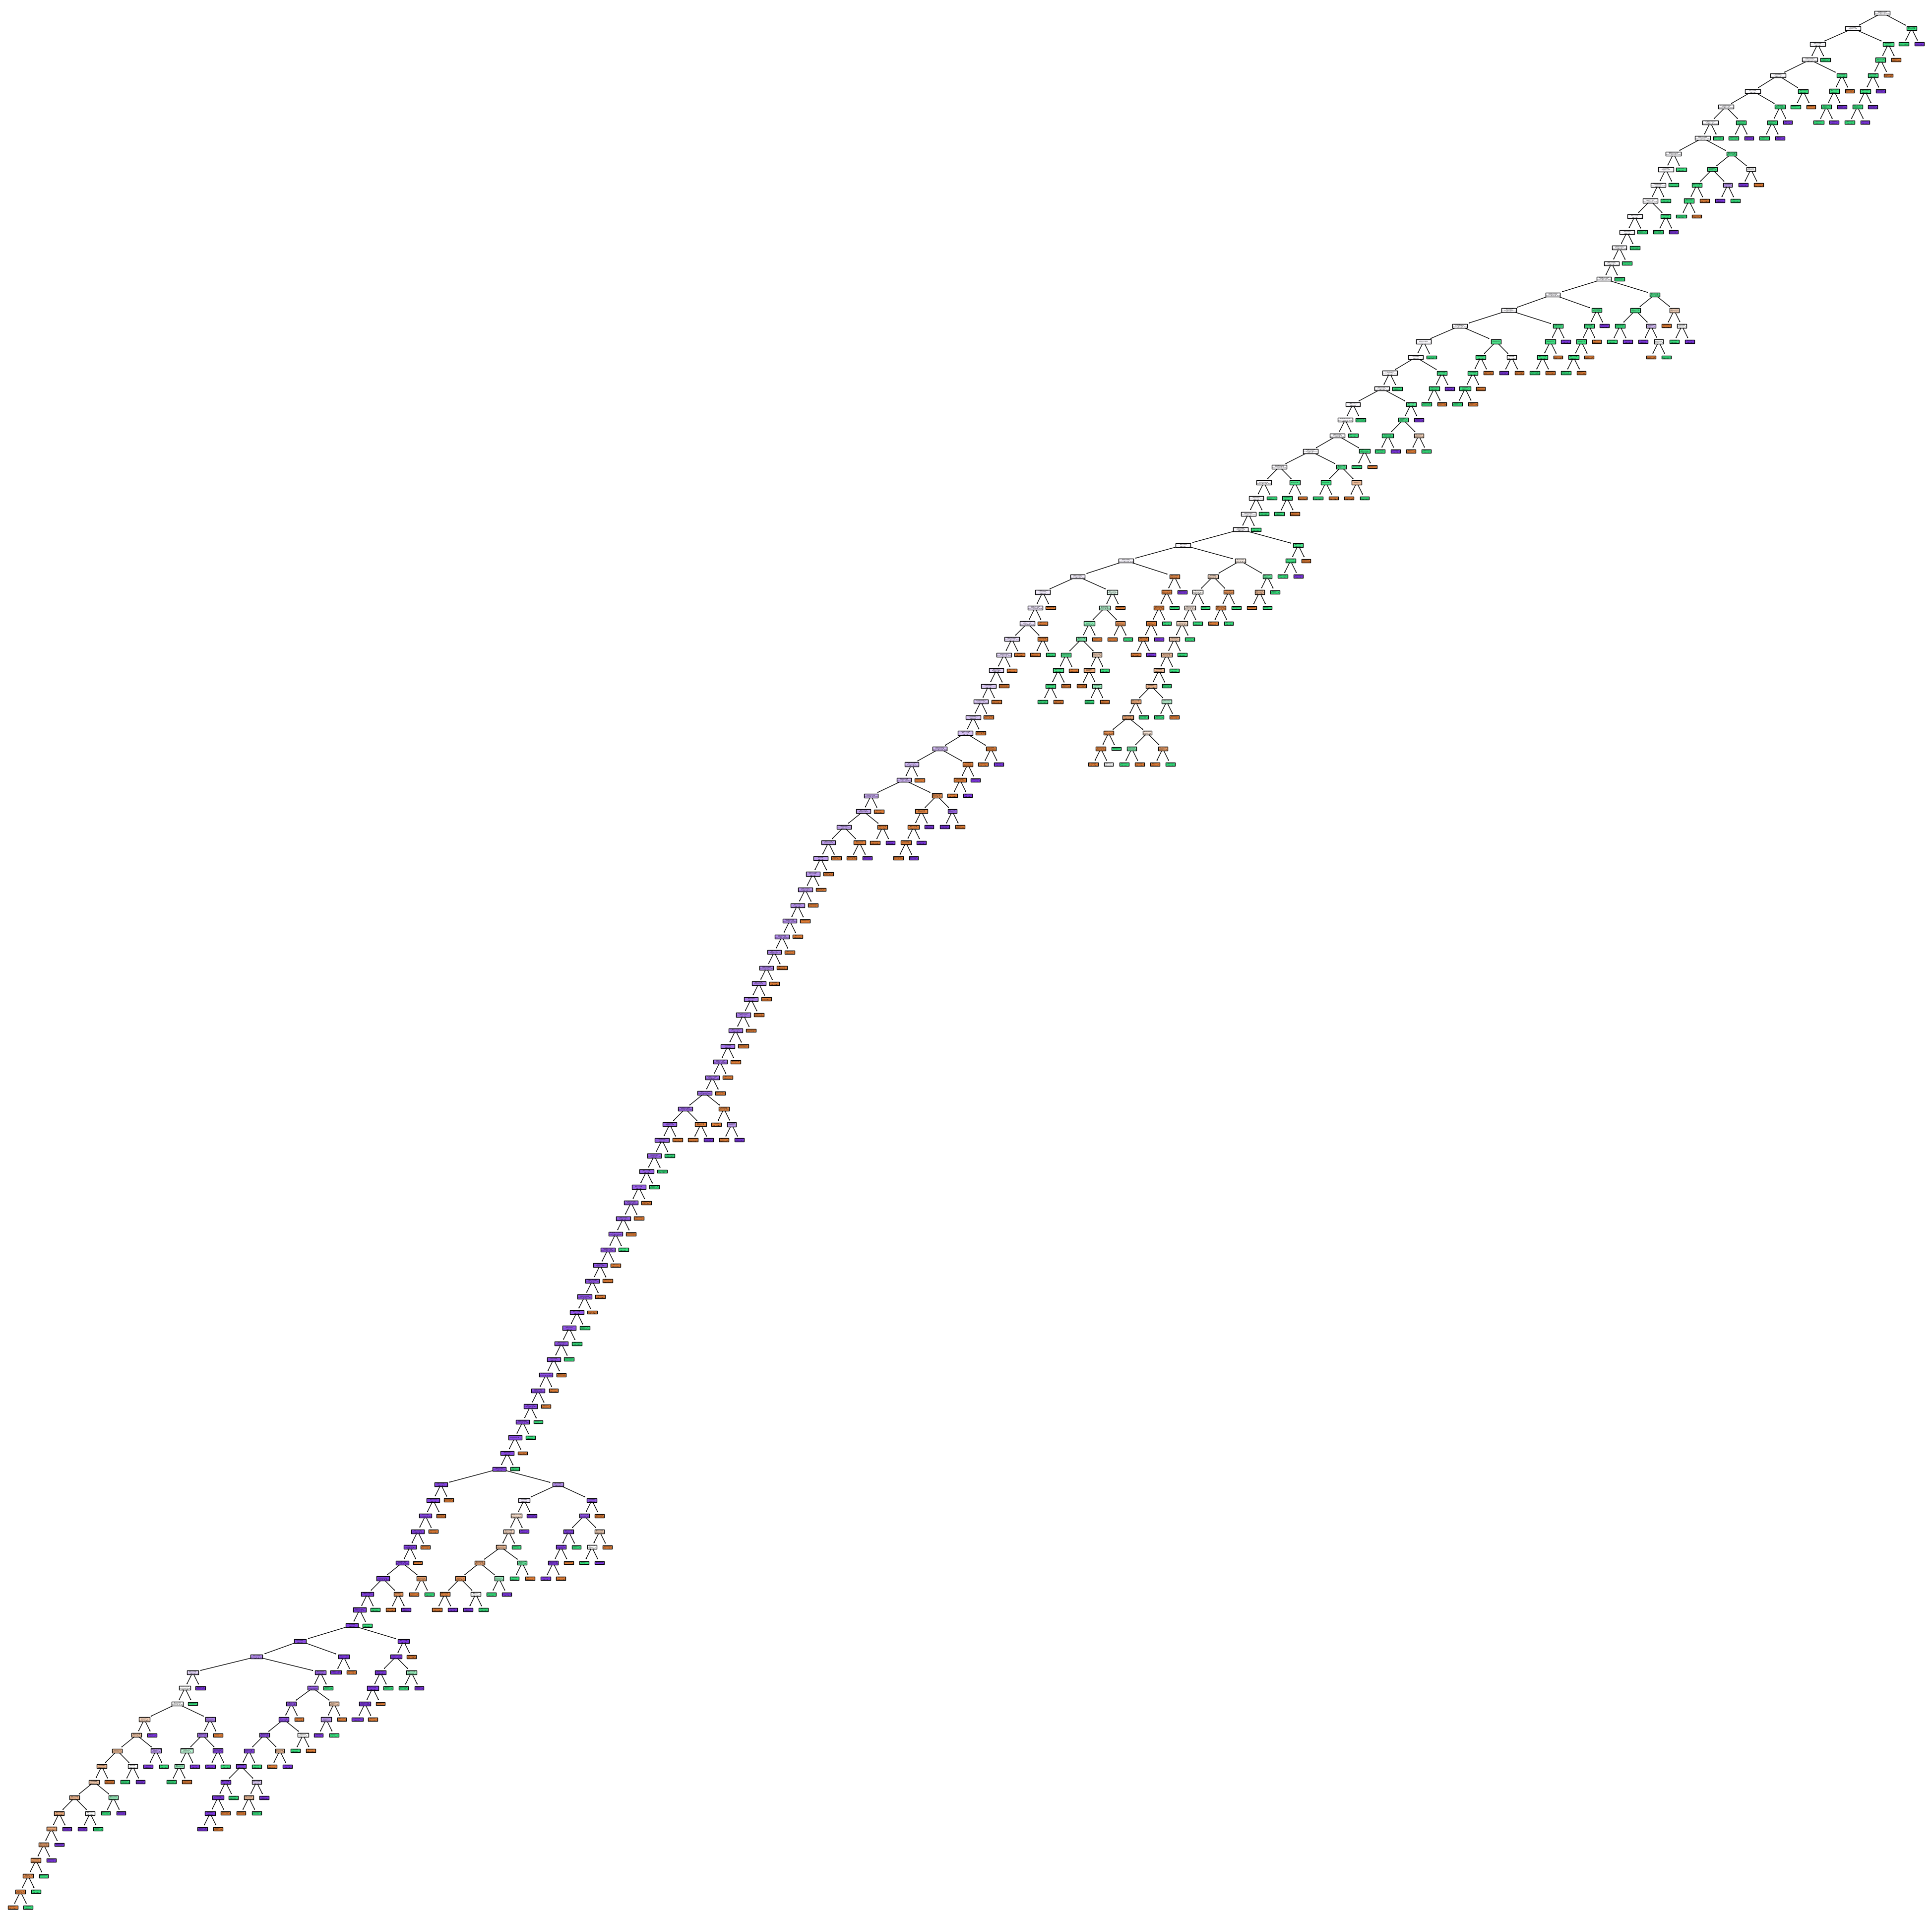

In [138]:
# Visualize the decision tree
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(model,                                
                   feature_names=X_train.columns,       
                   class_names=model.classes_,
                   filled=True)

# Save the plotted decision tree
plt.savefig('decision_tree_plot.png', dpi=500)

# Display the plot
plt.show()

In [124]:
# Import Dependency
import joblib

# Save the trained model using joblib
joblib.dump(model, 'TF-IDF_model.joblib')

['TF-IDF_model.joblib']

# Creating a Forest!

In [78]:
# Import Dependency
from sklearn.ensemble import RandomForestClassifier

In [113]:
# Create an ensemble using Random Forest Classifier algorithm
ensemble = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_leaf=3, max_samples=4700, random_state=72)

# Fit the model using the ensemble
model = ensemble.fit(X_train, y_train)

# Make predictions using test data
en_predictions = model.predict(X_test)


In [114]:
# Calculate accuracy score, classification report and confusion matrix
en_accuracy = accuracy_score(y_test, en_predictions)
en_report = classification_report(y_test, en_predictions)
en_matrix = confusion_matrix(y_test, en_predictions)

In [115]:
# Display results
print(f"Accuracy Score: {en_accuracy}")
print(" ")
print("The classification report:")
print(en_report)
print(" ")
print("The confusion matrix:")
print(en_matrix)

Accuracy Score: 0.8939393939393939
 
The classification report:
              precision    recall  f1-score   support

       anger       0.95      0.88      0.91       412
        fear       0.96      0.84      0.90       407
         joy       0.80      0.97      0.88       369

    accuracy                           0.89      1188
   macro avg       0.90      0.90      0.89      1188
weighted avg       0.91      0.89      0.89      1188

 
The confusion matrix:
[[362   5  45]
 [ 19 341  47]
 [  2   8 359]]


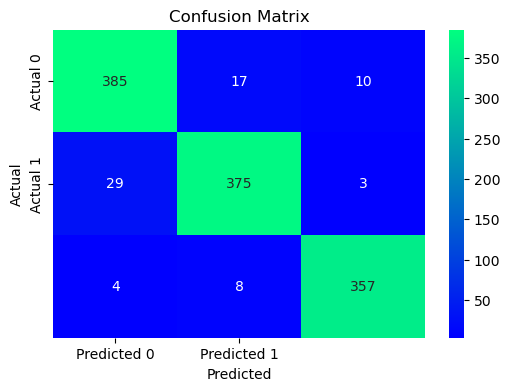

In [116]:
# Plot and display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='winter', fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Visualize the decision tree
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(model,                                
                   feature_names=X_train.columns,       
                   class_names=model.classes_,
                   filled=True)

# Save the plotted decision tree
plt.savefig('RF_decision_tree_plot.png', dpi=500)

# Display the plot
plt.show()